# Загрузка Pandas и очистка данных

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [ ]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [ ]:
!pip freeze > requirements.txt

In [12]:
data = pd.read_csv('main_task_new.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [13]:
display(data)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [25]:
X = data.drop(['Restaurant_id', 'Rating', 'City', 'Cuisine Style', 'Price Range', 'Reviews', 'URL_TA', 'ID_TA'], axis=1)
X = X.fillna(0)
y = data['Rating']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            40000 non-null  float64
 1   Number of Reviews  40000 non-null  float64
dtypes: float64(2)
memory usage: 625.1 KB


None

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
regr = RandomForestRegressor(n_estimators=100)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.4281112501984127


In [61]:
type(data['Cuisine Style'][0])

str

In [57]:
cuisine = data['Cuisine Style'][1]
cuisine = cuisine.replace('[', '')
cuisine = cuisine.replace(']', '')
cuisine = cuisine.replace(' ', '')
cuisine = cuisine.replace("'", '')
list_cuisine = cuisine.split(',')
type(list_cuisine)

AttributeError: 'float' object has no attribute 'replace'

In [66]:
def make_list(x):
    if type(x) == str:
        x = x.replace('[', '')
        x = x.replace(']', '')
        x = x.replace(' ', '')
        x = x.replace("'", '')
        x_list = x.split(',')
        return x_list
    else:
        return x

In [68]:
data['Cuisine Style'] = data['Cuisine Style'].apply(make_list)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"[Japanese, Sushi, Asian, Grill, VegetarianFrie...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"[German, CentralEuropean, VegetarianFriendly]",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"[Italian, VegetarianFriendly, VeganOptions, Gl...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"[French, American, Bar, European, VegetarianFr...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"[Polish, European, EasternEuropean, CentralEur...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [70]:
data['Cuisine Style'][0][1]

'French'

In [71]:
new_data = data.explode('Cuisine Style')
new_data

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,European,5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
0,id_5569,Paris,French,5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
0,id_5569,Paris,International,5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,Japanese,353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
...,...,...,...,...,...,...,...,...,...,...
39998,id_640,Warsaw,European,641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838
39998,id_640,Warsaw,EasternEuropean,641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838
39998,id_640,Warsaw,CentralEuropean,641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838
39998,id_640,Warsaw,VegetarianFriendly,641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [73]:
dummy_data = pd.get_dummies(new_data, columns = ['Cuisine Style'], dummy_na=True)
dummy_data

,Restaurant_id,City,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,Cuisine Style_Afghani,Cuisine Style_African,Cuisine Style_Albanian,Cuisine Style_American,Cuisine Style_Arabic,Cuisine Style_Argentinean,Cuisine Style_Armenian,Cuisine Style_Asian,Cuisine Style_Australian,Cuisine Style_Austrian,Cuisine Style_Azerbaijani,Cuisine Style_Balti,Cuisine Style_Bangladeshi,Cuisine Style_Bar,Cuisine Style_Barbecue,Cuisine Style_Belgian,...,Cuisine Style_SouthAmerican,Cuisine Style_Southwestern,Cuisine Style_Spanish,Cuisine Style_SriLankan,Cuisine Style_Steakhouse,Cuisine Style_StreetFood,Cuisine Style_Sushi,Cuisine Style_Swedish,Cuisine Style_Swiss,Cuisine Style_Taiwanese,Cuisine Style_Thai,Cuisine Style_Tibetan,Cuisine Style_Tunisian,Cuisine Style_Turkish,Cuisine Style_Ukrainian,Cuisine Style_Uzbek,Cuisine Style_VeganOptions,Cuisine Style_VegetarianFriendly,Cuisine Style_Venezuelan,Cuisine Style_Vietnamese,Cuisine Style_Welsh,Cuisine Style_WineBar,Cuisine Style_Xinjiang,Cuisine Style_Yunnan,Cuisine Style_nan
0,id_5569,Paris,5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,id_5569,Paris,5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,id_5569,Paris,5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_1535,Stockholm,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,id_352,London,353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39998,id_640,Warsaw,641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39998,id_640,Warsaw,641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39998,id_640,Warsaw,641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39998,id_640,Warsaw,641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


<AxesSubplot:>

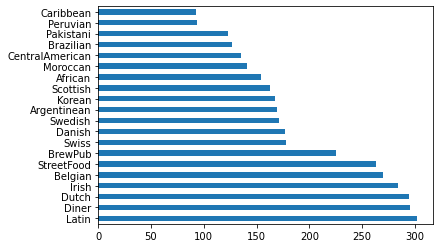

In [84]:
new_data['Cuisine Style'].value_counts()[50:70].plot(kind='barh')

In [85]:
data

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"[Japanese, Sushi, Asian, Grill, VegetarianFrie...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"[German, CentralEuropean, VegetarianFriendly]",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"[Italian, VegetarianFriendly, VeganOptions, Gl...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"[French, American, Bar, European, VegetarianFr...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"[Polish, European, EasternEuropean, CentralEur...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [90]:
list_of_cuisines = new_data['Cuisine Style'].value_counts().index[0:70]
list_of_other_cuisines = new_data['Cuisine Style'].value_counts().index[70:]


Index(['Nepali', 'Balti', 'Bangladeshi', 'Norwegian', 'Israeli', 'Slovenian',
       'Indonesian', 'Russian', 'Persian', 'Arabic', 'Kosher', 'Ethiopian',
       'Venezuelan', 'Malaysian', 'Croatian', 'Jamaican', 'SriLankan',
       'Tibetan', 'Australian', 'Cuban', 'Afghani', 'Taiwanese', 'Hawaiian',
       'Tunisian', 'Colombian', 'Cambodian', 'Cajun&Creole', 'Egyptian',
       'Singaporean', 'Ukrainian', 'Southwestern', 'Georgian', 'Armenian',
       'Mongolian', 'Filipino', 'CentralAsian', 'MinorityChinese', 'Romanian',
       'Albanian', 'Chilean', 'NewZealand', 'Canadian', 'Uzbek', 'Ecuadorean',
       'NativeAmerican', 'Caucasian', 'Welsh', 'Fujian', 'Azerbaijani',
       'Polynesian', 'Latvian', 'Yunnan', 'Xinjiang', 'Salvadoran', 'Burmese'],
      dtype='object')

In [89]:
for x in list_of_cuisines:
    data[x]= 0
data

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,VegetarianFriendly,European,Mediterranean,Italian,VeganOptions,GlutenFreeOptions,Bar,French,Asian,Pizza,Spanish,Pub,Cafe,FastFood,British,...,SouthAmerican,Polish,Hungarian,Scandinavian,Lebanese,Latin,Diner,Dutch,Irish,Belgian,StreetFood,BrewPub,Swiss,Danish,Swedish,Argentinean,Korean,Scottish,African,Moroccan,CentralAmerican,Brazilian,Pakistani,Peruvian,Caribbean
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_352,London,"[Japanese, Sushi, Asian, Grill, VegetarianFrie...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_615,Munich,"[German, CentralEuropean, VegetarianFriendly]",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"[Italian, VegetarianFriendly, VeganOptions, Gl...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39996,id_6340,Paris,"[French, American, Bar, European, VegetarianFr...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39998,id_640,Warsaw,"[Polish, European, EasternEuropean, CentralEur...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [144]:
def my_dummies(df):
    for i in range(40000):
        for y in list_of_cuisines:
            if type(df.loc[i, 'Cuisine Style']) is list:
                if y in df.loc[i, 'Cuisine Style']:
                    df.loc[i, y] = 1
                else:
                    df.loc[i, y] = 0
            else:
                continue
    return df
            

In [145]:
data1 = my_dummies(data)

In [147]:
data1['RareCuisine'] = 0
data1

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,VegetarianFriendly,European,Mediterranean,Italian,VeganOptions,GlutenFreeOptions,Bar,French,Asian,Pizza,Spanish,Pub,Cafe,FastFood,British,...,Polish,Hungarian,Scandinavian,Lebanese,Latin,Diner,Dutch,Irish,Belgian,StreetFood,BrewPub,Swiss,Danish,Swedish,Argentinean,Korean,Scottish,African,Moroccan,CentralAmerican,Brazilian,Pakistani,Peruvian,Caribbean,RareCuisine
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_352,London,"[Japanese, Sushi, Asian, Grill, VegetarianFrie...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_615,Munich,"[German, CentralEuropean, VegetarianFriendly]",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"[Italian, VegetarianFriendly, VeganOptions, Gl...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39996,id_6340,Paris,"[French, American, Bar, European, VegetarianFr...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39998,id_640,Warsaw,"[Polish, European, EasternEuropean, CentralEur...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [135]:
data.loc[2, 'Cuisine Style'].__class__ is list

True

In [126]:
data['Cuisine Style'][1]

nan

In [151]:
def dummy_for_rare(df):
    for i in range(40000):
        if df.loc[i, 'Cuisine Style'].__class__ is list:
            for y in df.loc[i, 'Cuisine Style']:
                if y in list_of_other_cuisines:
                    df.loc[i, 'RareCuisine'] = 1
                else:
                    continue
        else:
            continue
    return df['RareCuisine']

In [153]:
data1_with_rare = dummy_for_rare(data1)

In [154]:
data1_with_rare.value_counts()

0    38796
1     1204
Name: RareCuisine, dtype: int64

In [156]:
data1['RareCuisine'] = data1_with_rare

In [157]:
data1

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,VegetarianFriendly,European,Mediterranean,Italian,VeganOptions,GlutenFreeOptions,Bar,French,Asian,Pizza,Spanish,Pub,Cafe,FastFood,British,...,Polish,Hungarian,Scandinavian,Lebanese,Latin,Diner,Dutch,Irish,Belgian,StreetFood,BrewPub,Swiss,Danish,Swedish,Argentinean,Korean,Scottish,African,Moroccan,CentralAmerican,Brazilian,Pakistani,Peruvian,Caribbean,RareCuisine
0,id_5569,Paris,"[European, French, International]",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_352,London,"[Japanese, Sushi, Asian, Grill, VegetarianFrie...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_615,Munich,"[German, CentralEuropean, VegetarianFriendly]",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"[Italian, VegetarianFriendly, VeganOptions, Gl...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39996,id_6340,Paris,"[French, American, Bar, European, VegetarianFr...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39997,id_1649,Stockholm,"[Japanese, Sushi]",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39998,id_640,Warsaw,"[Polish, European, EasternEuropean, CentralEur...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [159]:
def change_price(x):
    if x=='$$ - $$$':
        return 2
    if x=='$':
        return 1
    if x=='$$$$':
        return 3
    else:
        return 0

In [160]:
data1['Price Range'] = data1['Price Range'].apply(change_price)

In [169]:
data1 = pd.get_dummies(data1, columns = ['City'], dummy_na = True)

In [185]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()


In [236]:
data1

,Restaurant_id,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,VegetarianFriendly,European,Mediterranean,Italian,VeganOptions,GlutenFreeOptions,Bar,French,Asian,Pizza,Spanish,Pub,Cafe,FastFood,British,International,...,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_5569,"[European, French, International]",5570.0,3.5,2,194.0,"[Goodfoodatyourdoorstep, Agoodhotelrestaurant,...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,id_1535,NaN,1537.0,4.0,0,10.0,"[Uniquecuisine, DeliciousNepalesefood, 2017-07...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,id_352,"[Japanese, Sushi, Asian, Grill, VegetarianFrie...",353.0,4.5,3,688.0,"[Catchupwithfriends, Notexceptional, 2018-01-0...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_3456,NaN,3458.0,5.0,0,3.0,"[, ]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_615,"[German, CentralEuropean, VegetarianFriendly]",621.0,4.0,2,84.0,"[BestplacetotryaBavarianfood, Nicebuildingbuti...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,"[Italian, VegetarianFriendly, VeganOptions, Gl...",500.0,4.5,2,79.0,"[TherealItalianexperience!, Wonderfulfood, won...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
39996,id_6340,"[French, American, Bar, European, VegetarianFr...",6341.0,3.5,2,542.0,"[Parisianatmosphere, Bitpriceybutinterestingde...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
39997,id_1649,"[Japanese, Sushi]",1652.0,4.5,0,4.0,"[Goodbyswedishstandards, Ahiddenjewelinthemidd...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
39998,id_640,"[Polish, European, EasternEuropean, CentralEur...",641.0,4.0,2,70.0,"[Undergroundrestaurant, OldestRestaurantinWars...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [190]:
X = data1.drop(['Restaurant_id', 'Rating', 'Cuisine Style', 'Reviews', 'URL_TA', 'ID_TA'], axis=1)
X = X.fillna(0)
y = data1['Rating']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [191]:
X

,Ranking,Price Range,Number of Reviews,VegetarianFriendly,European,Mediterranean,Italian,VeganOptions,GlutenFreeOptions,Bar,French,Asian,Pizza,Spanish,Pub,Cafe,FastFood,British,International,Seafood,Japanese,CentralEuropean,American,Sushi,Chinese,...,City_Copenhagen,City_Dublin,City_Edinburgh,City_Geneva,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,5570.0,2,194.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1537.0,0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,353.0,3,688.0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3458.0,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,621.0,2,84.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,500.0,2,79.0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
39996,6341.0,2,542.0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
39997,1652.0,0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
39998,641.0,2,70.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [192]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
regr = RandomForestRegressor(n_estimators=100)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [193]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20924250000000003


<AxesSubplot:>

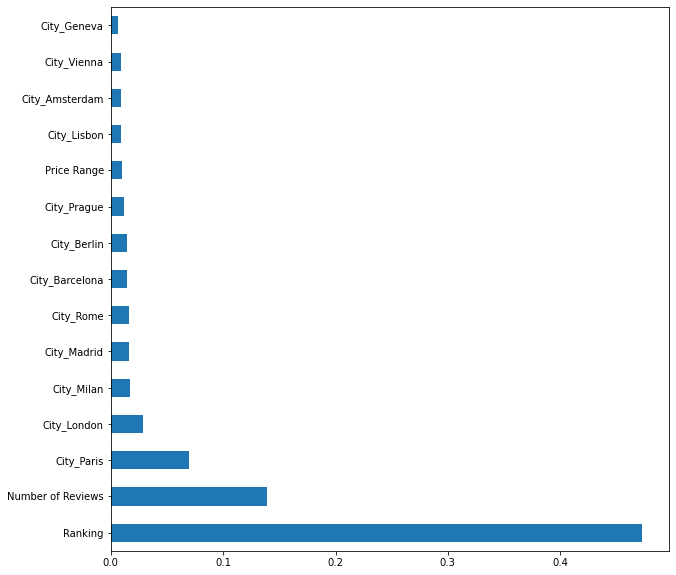

In [194]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [400]:
def make_list_reviews(x):
    if type(x) == str:
        x = x.replace('[', '')
        x = x.replace(',', '')
        x = x.replace(' ', '')
        x = x.replace("'", '')
        x_list = x.split("]")
        return x_list[1]
    else:
        return x

In [484]:
data1['Reviews'] = data['Reviews']

In [485]:
data1['dates_of_Reviews'] = data['Reviews'].apply(make_list_rev)

In [562]:
pd.isna(np.max(data1['dates_of_Reviews'][2]))
(pd.isna(data1['dates_of_Reviews'][16]))

False

In [563]:
def days_last_review(x):
    if type(x) is list:
        last_review = np.max(x)
        now = datetime.now()
        return (now - last_review).days
    else:
        if pd.isna(x):
            return x
        if not pd.isna(x):
            return (datetime.now() - x).days
        else:
            return x

In [564]:
data1['days from last'] = data1['dates_of_Reviews'].apply(days_last_review)

In [570]:
data1['days from last'].mean()

1539.3506129388254

In [486]:
import datetime
from datetime import datetime, timedelta
def quantity_opinions(x):
    if len(x)==20:
        i = datetime.strptime(x[:10],'%m/%d/%Y')
        z = datetime.strptime(x[10:],'%m/%d/%Y')
        return [i, z]
    elif len(x)==10:
        return datetime.strptime(x, '%m/%d/%Y')
    else:
        return None

In [487]:
data1['dates_of_Reviews'] = data1['dates_of_Reviews'].apply(quantity_opinions)

In [488]:
def time_between_reviews(x):
    if type(x) is list:
        y = x[0]-x[1]
        return y.days
    else:
        return None

In [489]:
data1['quantity_of_reviews'] = data1['dates_of_Reviews'].apply(time_between_reviews)

In [503]:
data1['quantity_of_reviews'].fillna(np.mean(data1['quantity_of_reviews']), inplace=True)
data1['quantity_of_reviews'].median()

121.0

In [438]:
pd.isna(data1['quantity_of_reviews'][3])

True

In [507]:
abs(103.7)

103.7

In [441]:
data1['quantity_of_reviews'] = data1['quantity_of_reviews'].fillna(np.median(data1['quantity_of_reviews']))

In [450]:
data.City.unique()

array(['Paris', 'Stockholm', 'London', 'Berlin', 'Munich', 'Oporto',
       'Milan', 'Bratislava', 'Vienna', 'Rome', 'Barcelona', 'Madrid',
       'Dublin', 'Brussels', 'Zurich', 'Warsaw', 'Budapest', 'Copenhagen',
       'Amsterdam', 'Lyon', 'Hamburg', 'Lisbon', 'Prague', 'Oslo',
       'Helsinki', 'Edinburgh', 'Geneva', 'Ljubljana', 'Athens',
       'Luxembourg', 'Krakow'], dtype=object)

In [451]:
cities_dict = {'Paris':2148327, 'Stockholm':975550, 'London':8961989,'Berlin':3669491,'Munich':1488202,'Oporto':214349,'Milan':1399860,'Bratislava':424428,'Vienna':1921153,'Rome':2790712,'Barcelona':1664182,'Madrid':3334730,
'Dublin': 1173179,'Brussels':1212352,'Zurich':402762,'Warsaw':1793579,'Budapest':1750216,'Copenhagen':794023,'Amsterdam':872757,'Lyon':516092,'Hamburg':1845229,'Lisbon':506654,'Prague':1335084,'Oslo':697010,'Helsinki':656250,
'Edinburgh':482005,'Geneva':198979,'Ljubljana':279631,'Athens':664046,'Luxembourg':114303,'Krakow':779115 }

In [452]:
data1['population'] = data['City'].apply(lambda x: cities_dict[x])

In [477]:
RANDOM_SEED = 42

In [473]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
data1['population'] = scaler.fit_transform(np.array(data1['population']).reshape(-1,1))

In [481]:
X = data1.drop(['Restaurant_id', 'Rating', 'Cuisine Style', 'Reviews', 'URL_TA', 'ID_TA', 'dates_of_Reviews'], axis=1)
X = X.fillna(0)
y = data1['Rating']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
regr = RandomForestRegressor(n_estimators=100)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [482]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20845100000000003


<AxesSubplot:>

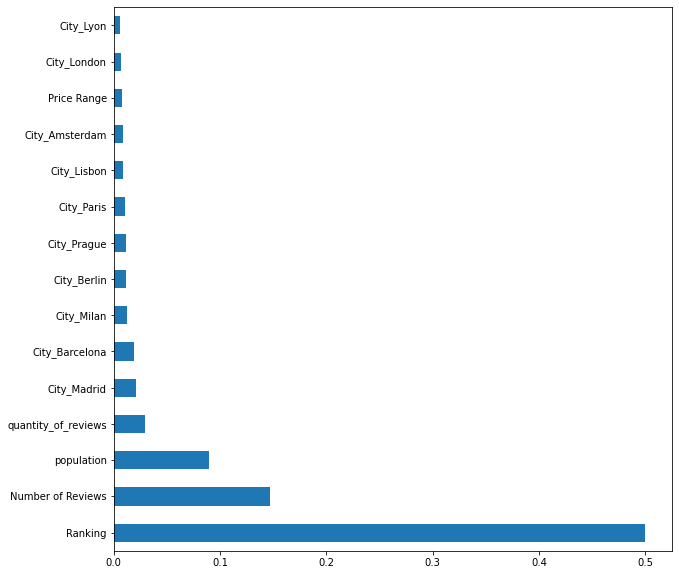

In [480]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [483]:
data1['Price Range'].value_counts()

2    18412
0    13886
1     6279
3     1423
Name: Price Range, dtype: int64

In [571]:
data1

,Restaurant_id,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,VegetarianFriendly,European,Mediterranean,Italian,VeganOptions,GlutenFreeOptions,Bar,French,Asian,Pizza,Spanish,Pub,Cafe,FastFood,British,International,...,City_Hamburg,City_Helsinki,City_Krakow,City_Lisbon,City_Ljubljana,City_London,City_Luxembourg,City_Lyon,City_Madrid,City_Milan,City_Munich,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,dates_of_Reviews,quantity_of_reviews,population,days from last
0,id_5569,"[European, French, International]",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,"[2017-12-31 00:00:00, 2017-11-20 00:00:00]",41.000000,0.229893,1307.0
1,id_1535,NaN,1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"[2017-07-06 00:00:00, 2016-06-19 00:00:00]",382.000000,0.097341,1485.0
2,id_352,"[Japanese, Sushi, Asian, Grill, VegetarianFrie...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[2018-01-08 00:00:00, 2018-01-06 00:00:00]",2.000000,1.000000,1299.0
3,id_3456,NaN,3458.0,5.0,0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,None,124.085327,0.401821,NaN
4,id_615,"[German, CentralEuropean, VegetarianFriendly]",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"[2017-11-18 00:00:00, 2017-02-19 00:00:00]",272.000000,0.155283,1350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,id_499,"[Italian, VegetarianFriendly, VeganOptions, Gl...",500.0,4.5,2,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,"[2017-12-16 00:00:00, 2017-11-12 00:00:00]",34.000000,0.145299,1322.0
39996,id_6340,"[French, American, Bar, European, VegetarianFr...",6341.0,3.5,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,"[2017-12-21 00:00:00, 2017-12-12 00:00:00]",9.000000,0.229893,1317.0
39997,id_1649,"[Japanese, Sushi]",1652.0,4.5,0,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"[2016-11-03 00:00:00, 2008-04-12 00:00:00]",3127.000000,0.097341,1730.0
39998,id_640,"[Polish, European, EasternEuropean, CentralEur...",641.0,4.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,"[2017-07-11 00:00:00, 2017-06-18 00:00:00]",23.000000,0.189798,1480.0


In [577]:
data1['Cuisine Style'][1].iloc

AttributeError: 'float' object has no attribute 'iloc'